<a href="https://colab.research.google.com/github/Dim4s4ufa/MSIB-K2-KelasAwanPintar/blob/main/Salinan_dari_AIJ0202S2302_C01_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

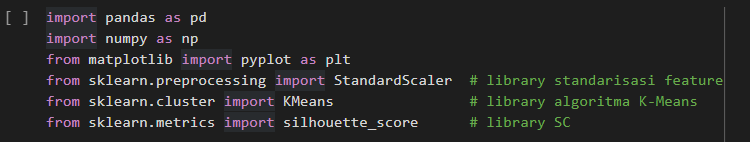

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # Library standardisasi fitur
from sklearn.cluster import KMeans              # Library algoritma K-Means
from sklearn.metrics import silhouette_score   # Library SC

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

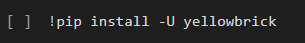

In [ ]:
# Tulis di sini
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

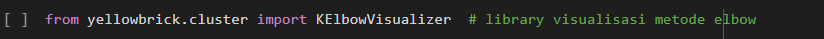

In [ ]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer  # Library visualisasi metode elbow

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

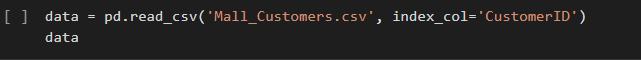

In [ ]:
# Tulis di sini
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

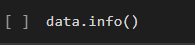

In [ ]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

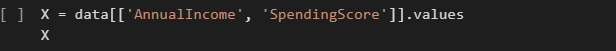

In [ ]:
# Tulis di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

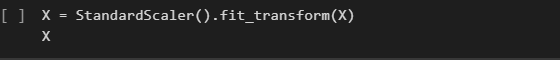

In [ ]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



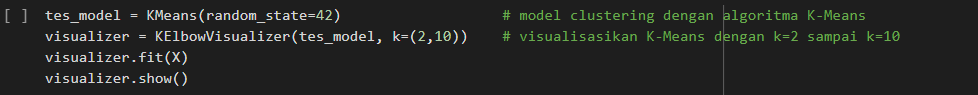

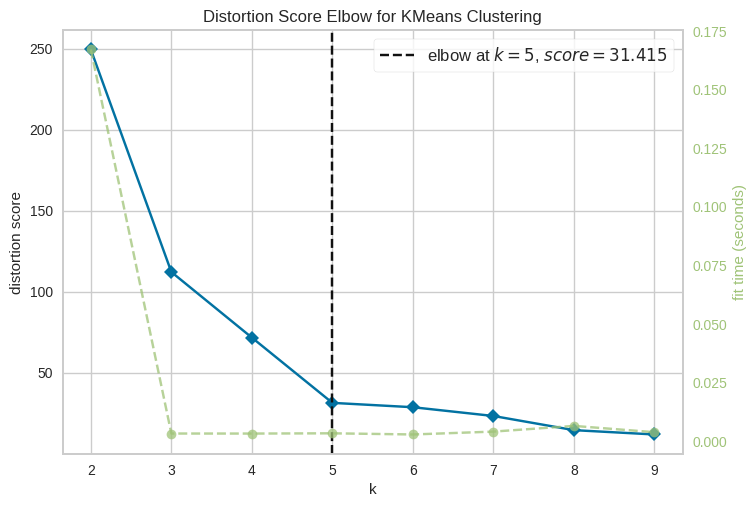

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Tulis di sini
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means
visualizer = KElbowVisualizer(tes_model, k=(2,10))  # visualisasikan K-Means dengan k=2 sampai k=10
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

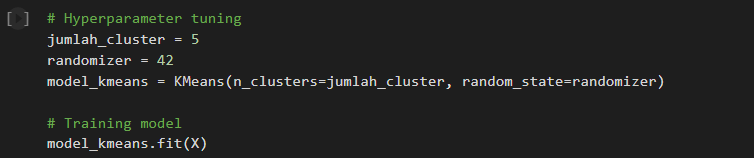

In [ ]:
# Tulis di sini
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

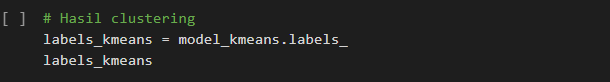

In [ ]:
# Tulis di sini
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

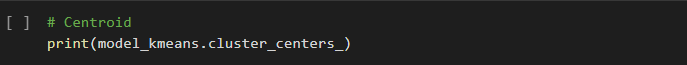

In [ ]:
# Tulis di sini
print(model_kmeans.cluster_centers_)

[[-0.17079383 -0.15322869]
 [ 7.52694521 -0.11868539]
 [-0.11772005  0.91897759]
 [-0.09894748 -1.20506271]
 [ 0.37342132  4.15876808]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

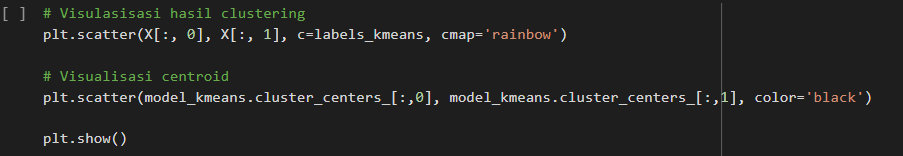

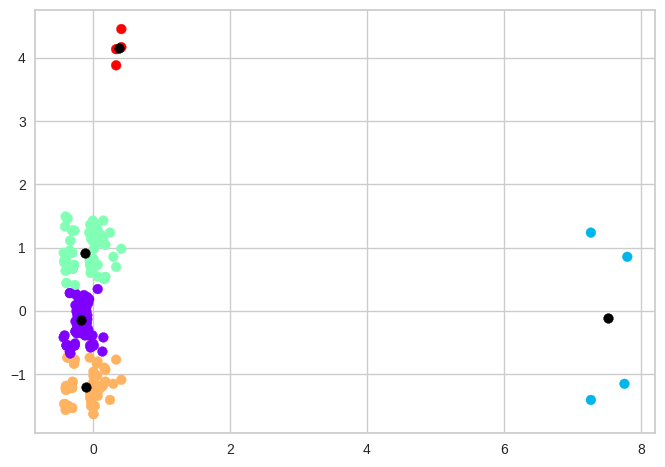

In [ ]:
# Tulis di sini
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

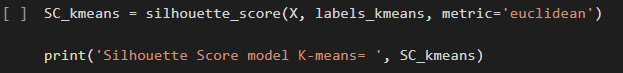

In [ ]:
# Tulis si sini
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print('Silhouette Score model K-means: ', SC_kmeans)

Silhouette Score model K-means:  0.5726323363916132


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

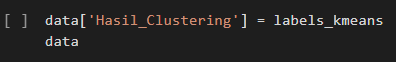

In [ ]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

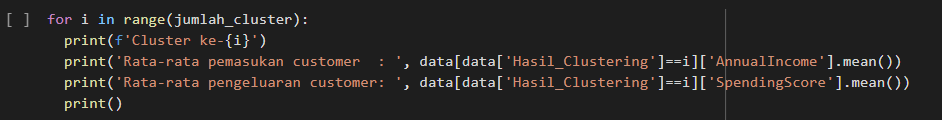

In [ ]:
# Tulis di sini
for i in range(jumlah_cluster):
    print(f"Cluster ke-{i+1}")
    print(f"Rata-rata pemasukan customer: {data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean()}")
    print(f"Rata-rata pengeluaran customer: {data[data['Hasil_Clustering'] == i]['SpendingScore'].mean()}")
    print()

Cluster ke-1
Rata-rata pemasukan customer: 52.722772277227726
Rata-rata pengeluaran customer: 47.415841584158414

Cluster ke-2
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5

Cluster ke-3
Rata-rata pemasukan customer: 60.4054054054054
Rata-rata pengeluaran customer: 81.06756756756756

Cluster ke-4
Rata-rata pemasukan customer: 63.12280701754386
Rata-rata pengeluaran customer: 14.403508771929825

Cluster ke-5
Rata-rata pemasukan customer: 131.5
Rata-rata pengeluaran customer: 182.75



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
data = df[['Age', 'AnnualIncome', 'SpendingScore']]
data

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
235,35,1207,79
236,45,126,182
237,32,126,174
238,32,137,192


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

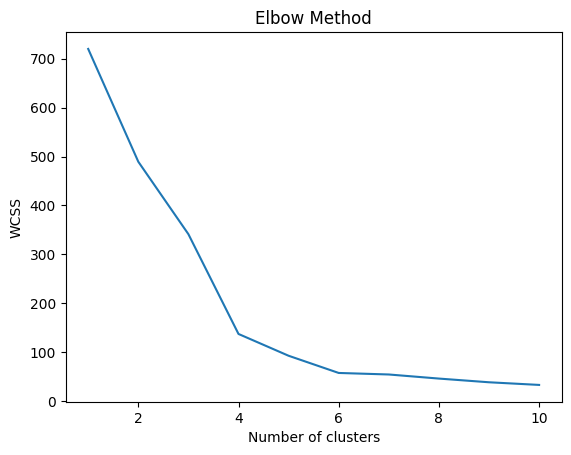

Silhouette Coefficient for K-Means: 0.4238827696585818


In [5]:
# Menentukan nilai K optimal menggunakan metode Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Memilih nilai K berdasarkan plot elbow
k_optimal = 3  # Contoh, sesuaikan berdasarkan plot

# Melatih model K-Means dengan nilai K optimal
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

# Menghitung Silhouette Coefficient
silhouette_avg_kmeans = silhouette_score(data_scaled, y_kmeans)
print("Silhouette Coefficient for K-Means:", silhouette_avg_kmeans)

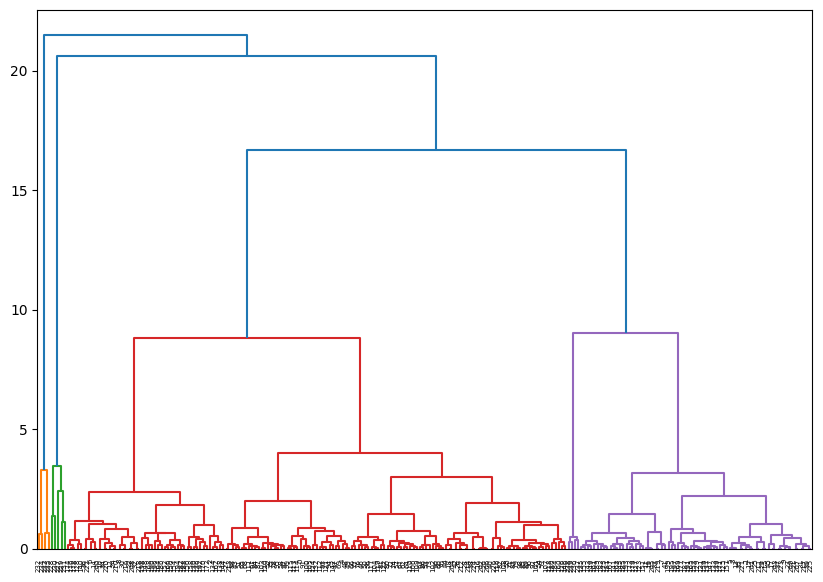

Silhouette Coefficient for AHC: 0.8135892809442039


In [8]:
# Menentukan nilai K optimal menggunakan dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))

# Remove distance_threshold and use 'color_threshold' or 'truncate_mode' instead for truncation.
# 'color_threshold' colors the dendrogram based on distance.
# 'truncate_mode' truncates the dendrogram to show a specific number of clusters or levels.

# Example using color_threshold:
dendrogram(linked, orientation='top', color_threshold=10) # Adjust the threshold value as needed

# Example using truncate_mode:
# dendrogram(linked, orientation='top', truncate_mode='level', p=3) # Show top 3 levels

plt.show()

# Memilih nilai K berdasarkan dendrogram
k_optimal = 3  # Contoh, sesuaikan berdasarkan dendrogram

# Melatih model AHC dengan nilai K optimal
hc = AgglomerativeClustering(n_clusters=k_optimal, metric='euclidean', linkage='ward') # Changed affinity to metric
y_hc = hc.fit_predict(data_scaled)

# Menghitung Silhouette Coefficient
silhouette_avg_hc = silhouette_score(data_scaled, y_hc)
print("Silhouette Coefficient for AHC:", silhouette_avg_hc)

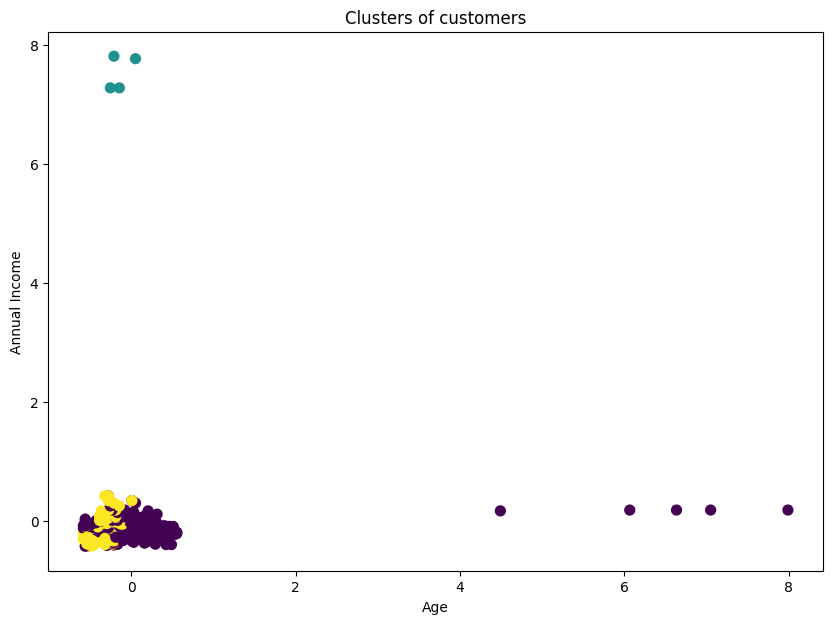

In [9]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Clusters of customers')
plt.show()

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # Library standardisasi fitur
from sklearn.cluster import KMeans              # Library algoritma K-Means
from sklearn.metrics import silhouette_score   # Library SC

In [11]:
!pip install -U yellowbrick

In [12]:
from yellowbrick.cluster import KElbowVisualizer  # Library visualisasi metode elbow

In [13]:
data = pd.read_csv('Customers.csv', index_col='CustomerID')
data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [15]:
X = data[['Annual Income ($)', 'Spending Score (1-100)']].values
X

array([[ 15000,     39],
       [ 35000,     81],
       [ 86000,      6],
       ...,
       [ 90961,     14],
       [182109,      4],
       [110610,     52]])

In [16]:
X = StandardScaler().fit_transform(X)
X

array([[-2.09350095, -0.42833854],
       [-1.65613312,  1.07554599],
       [-0.54084515, -1.6099621 ],
       ...,
       [-0.43235606, -1.3235079 ],
       [ 1.56090408, -1.68157565],
       [-0.00266404,  0.03714953]])

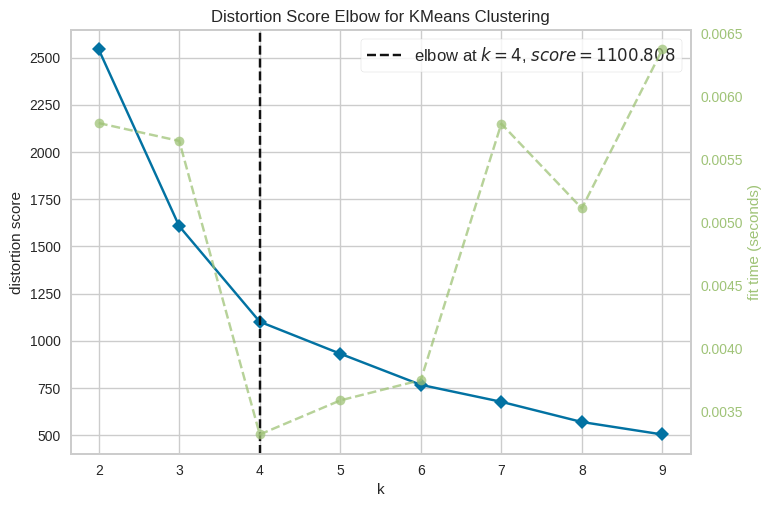

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means
visualizer = KElbowVisualizer(tes_model, k=(2,10))  # visualisasikan K-Means dengan k=2 sampai k=10
visualizer.fit(X)
visualizer.show()

In [18]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [19]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([3, 2, 3, ..., 3, 4, 1], dtype=int32)

In [20]:
print(model_kmeans.cluster_centers_)

[[ 0.80004493  1.23035132]
 [ 0.81884948 -0.03249465]
 [-0.88261228  0.83906727]
 [-0.85286929 -0.8658373 ]
 [ 0.87910367 -1.19420566]]


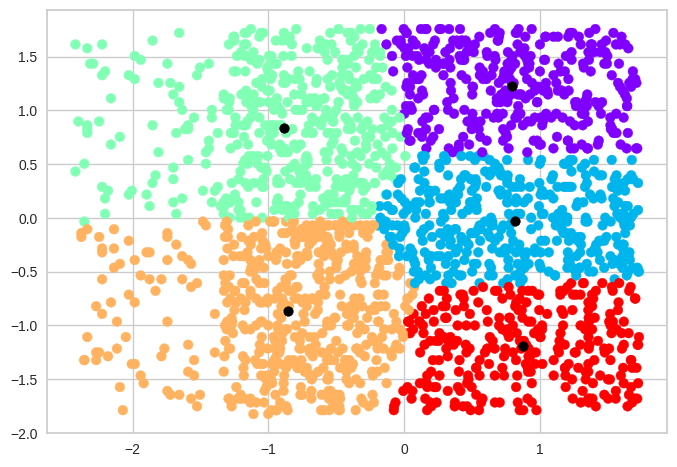

In [21]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

In [22]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')
print('Silhouette Score model K-means: ', SC_kmeans)

Silhouette Score model K-means:  0.36638981195167575


In [23]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Hasil_Clustering
CustomerID,,,,,,,,
1,Male,19,15000,39,Healthcare,1,4,3
2,Male,21,35000,81,Engineer,3,3,2
3,Female,20,86000,6,Engineer,1,1,3
4,Female,23,59000,77,Lawyer,0,2,2
5,Female,31,38000,40,Entertainment,2,6,3
...,...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7,1
1997,Female,91,73158,32,Doctor,7,7,3
1998,Male,87,90961,14,Healthcare,9,2,3


In [24]:
for i in range(jumlah_cluster):
    print(f"Cluster ke-{i+1}")
    print(f"Rata-rata pemasukan customer: {data[data['Hasil_Clustering'] == i]['Annual Income ($)'].mean()}")
    print(f"Rata-rata pengeluaran customer: {data[data['Hasil_Clustering'] == i]['Spending Score (1-100)'].mean()}")
    print()

Cluster ke-1
Rata-rata pemasukan customer: 147316.35628742515
Rata-rata pengeluaran customer: 85.32335329341318

Cluster ke-2
Rata-rata pemasukan customer: 148176.2525
Rata-rata pengeluaran customer: 50.055

Cluster ke-3
Rata-rata pemasukan customer: 70371.63870967741
Rata-rata pengeluaran customer: 74.39569892473118

Cluster ke-4
Rata-rata pemasukan customer: 71731.72904483431
Rata-rata pengeluaran customer: 26.78167641325536

Cluster ke-5
Rata-rata pemasukan customer: 150931.5625
Rata-rata pengeluaran customer: 17.61111111111111

